In [1]:

import pandas as pd
import numpy as np

df_tourismus = pd.read_csv("tourismus_sh_monate_filled.csv", sep=";")


        Monat       mean            std             ci
4      Januar   246391.1   48359.867959   29973.756699
3     Februar   304811.3   62379.671527   38663.320977
8        März   399960.4   92894.172599   57576.404687
0       April   506828.5  191727.742263  118834.085814
7         Mai   721732.4  156656.819860   97096.902904
6        Juni   829448.9  124957.967534   77449.750682
5        Juli  1043129.9  129857.917665   80486.771238
1      August  1005617.8  116521.959405   72221.058672
11  September   756523.9  114040.466582   70683.013486
10    Oktober   629947.8   95644.213748   59280.897850
9    November   347770.3  107473.211142   66612.586393
2    Dezember   326675.8  119410.984939   74011.695250


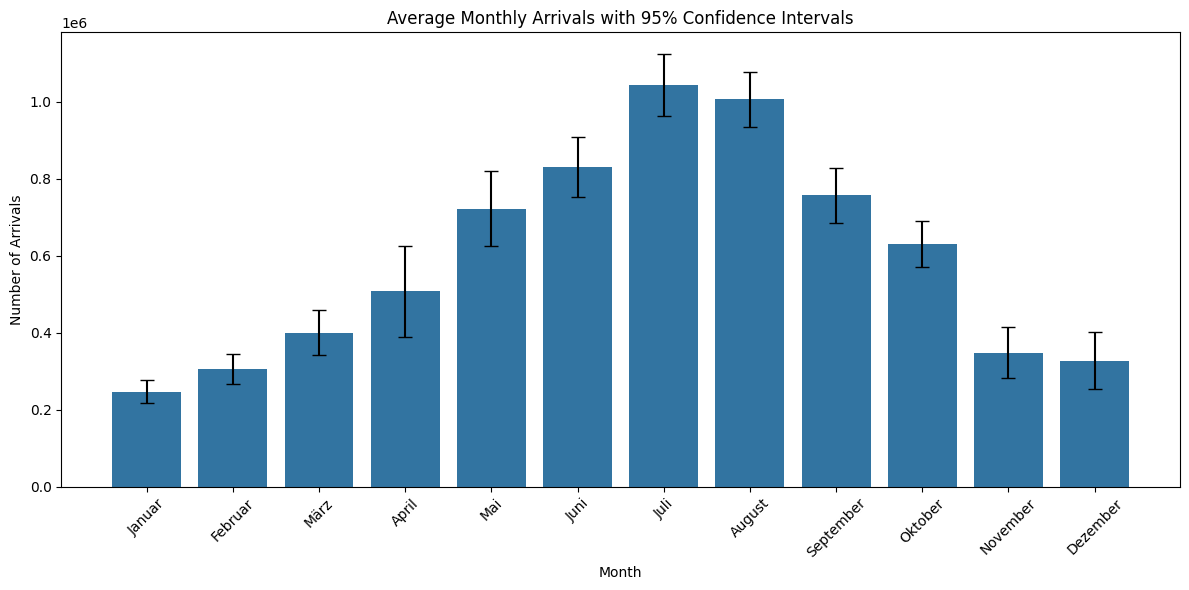

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define month order in German
month_order = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 
               'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']

# Calculate mean and confidence intervals by month
monthly_stats = df_tourismus.groupby('Monat')['Ankuenfte'].agg(['mean', 'std']).reset_index()
monthly_stats['Monat'] = pd.Categorical(monthly_stats['Monat'], categories=month_order, ordered=True)
monthly_stats = monthly_stats.sort_values('Monat')
monthly_stats['ci'] = 1.96 * monthly_stats['std'] / np.sqrt(len(df_tourismus['Jahr'].unique()))
print(monthly_stats)

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=monthly_stats, x='Monat', y='mean')

# Add error bars for confidence intervals
plt.errorbar(x=range(len(monthly_stats)), 
             y=monthly_stats['mean'],
             yerr=monthly_stats['ci'],
             fmt='none',
             color='black',
             capsize=5)

plt.title('Average Monthly Arrivals with 95% Confidence Intervals')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()